# Comparing the wordclouds for two different word vectorization methods.

## Topics

1.0 Importing packages and loading data

2.0 Cleaning text for analysis

    2.1 Cleaning the text

3.0 Grouping the tweets

4.0 Clustering of Tweets

5.0 Interpreting the results

## 1.0 Importing packages and loading data

Import all the packages and load the required data downloaded using TwitterSearchScraper.

In [2]:
import re
import tweepy as tw
import numpy as np
import pandas as pd
import snscrape.modules.twitter as sntwitter
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
# for making the image plot bigger in size
plt.rcParams['figure.figsize']=(10, 7)

The tweepy fetches tweets of a week but with a limit of count of tweets. In our case in 1 week there are tweets which exceed the limit, so we have used TwitterSearchScraper.

In [3]:
def fetch_tweets(keyword):
    # Creating list to append tweet data to
    tweets_list = []

    # Using TwitterSearchScraper to scrape data and append tweets to list
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(keyword + ' since:2022-02-25 until:2022-03-03').get_items()):
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
    # Creating a dataframe from the tweets list above
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
    return tweets_df

#### Below we will be fetching the tweets with a specific keyword and store it in a csv file.

In [6]:
Altcoin = fetch_tweets('#Altcoin')
Altcoin

,Datetime,Tweet Id,Text,Username
0,2022-03-02 23:59:54+00:00,1499172680569790464,$PARMA #STILTON $MRI #altcoin https://t.co/S5...,janeojanewin_
1,2022-03-02 23:59:12+00:00,1499172501724798979,MOON AKITA ($MAKA) #Altcoin via https://t.co/6...,nyan_lou618
2,2022-03-02 23:58:37+00:00,1499172353628151808,I’d appreciate it if you Checked out my new vi...,heyimsurge
3,2022-03-02 23:58:20+00:00,1499172283625181184,Aave Fear and Greed Index is currently 42 - MI...,AltcoinFGI
4,2022-03-02 23:57:21+00:00,1499172036618317824,$PARMA / #STILTON / $MRI / #altcoin https://t....,BinCoer
...,...,...,...,...
11040,2022-02-25 00:01:28+00:00,1496998747041148932,"Unlike most other coins, $TRAC made a new low ...",rmahdx
11041,2022-02-25 00:00:37+00:00,1496998530514309129,Earn passive income while you let your tokens ...,IbgFinance
11042,2022-02-25 00:00:04+00:00,1496998392962109440,#BTCSentinel #PriceAlert:\n\n⬆️ Top Gainers 1h...,SentinelBtc
11043,2022-02-25 00:00:02+00:00,1496998386968444938,Current BTC Dominance: 42.5% #Bitcoin #Altcoin...,btcdominance


In [7]:
Altcoin.to_csv("Tweets_Altcoin.csv")

In [7]:
Cryptocurrency = fetch_tweets('#Cryptocurrency')
Cryptocurrency

,Datetime,Tweet Id,Text,Username
0,2022-03-02 23:59:56+00:00,1499172688056705024,KPMG Purchases An NFT Following Crypto Investm...,cryptonews_is
1,2022-03-02 23:59:42+00:00,1499172628434767874,Gets me everytime... coming out of the red soo...,MayzeRunna
2,2022-03-02 23:59:41+00:00,1499172622407503872,"[Spot] By 2022-03-02 14:00 GMT, OMG had a pric...",CryptoCapflow
3,2022-03-02 23:59:33+00:00,1499172590711193604,Carebear2614 found #bitcoin in a User vault at...,Cgerdes8
4,2022-03-02 23:59:29+00:00,1499172575603265541,the innocent within our fear\n\n#NFTs #NFTarti...,MajorMoon6
...,...,...,...,...
73189,2022-02-25 00:00:01+00:00,1496998380010147842,high volatile #cryptocurrency in last 15 minut...,moon_or_earth
73190,2022-02-25 00:00:00+00:00,1496998377124413445,What does it mean by Day Traders?\n\nLearn mor...,CoinBounds
73191,2022-02-25 00:00:00+00:00,1496998376390467592,Current Price of Cardano:\n$0.853845 (-1.92%)\...,CryptoNerdApp
73192,2022-02-25 00:00:00+00:00,1496998376168206343,Current Price of Bitcoin:\n$38363 (2.65%)\n\n$...,CryptoNerdApp


In [8]:
Cryptocurrency.to_csv("Tweets_Cryptocurrency.csv")

In [5]:
Bitcoin = fetch_tweets('#Bitcoin')
Bitcoin

,Datetime,Tweet Id,Text,Username
0,2022-03-02 23:59:53+00:00,1499172672521048065,Whatever the mainstream media is narrating and...,GeryRodriguez73
1,2022-03-02 23:59:52+00:00,1499172668246876162,@TheMoonCarl #Solana #MATIC maybe #Ada but if ...,RucaTwolve
2,2022-03-02 23:59:51+00:00,1499172664023388161,@TartishaHill Congrats! Have you heard about $...,_CryptoCurator
3,2022-03-02 23:59:49+00:00,1499172659426312193,@jkenney Now eliminate the debt and add #bitco...,HodlersJourney
4,2022-03-02 23:59:44+00:00,1499172635502022659,@NorthmanTrader CITIZENS BUY #BITCOIN,DWOLFBTC
...,...,...,...,...
195472,2022-02-25 00:00:00+00:00,1496998376851664908,👏🏻Thank you for supporting ComingChat.\n\nFirs...,ComingChatApp
195473,2022-02-25 00:00:00+00:00,1496998376281411591,Thinking about finally investing in Cryptocurr...,CryptoNews_21
195474,2022-02-25 00:00:00+00:00,1496998376168206343,Current Price of Bitcoin:\n$38363 (2.65%)\n\n$...,CryptoNerdApp
195475,2022-02-25 00:00:00+00:00,1496998375782187008,📄 Hourly Report\n🖥 GMO Coin\n🕘 2022-02-25 09:0...,lawn_fx


In [6]:
Bitcoin.to_csv("Tweets_Bitcoin.csv")

In [15]:
for keyword in ['APPL', 'GOOG', 'YHOO', 'Coindesk', 'Gold']:
    df = fetch_tweets('#' + keyword)
    df.to_csv('Tweets_' + keyword + '.csv')

In [6]:
Altcoin=pd.read_csv("Tweets_Altcoin.csv")
Bitcoin=pd.read_csv("Tweets_Bitcoin.csv")
Coindesk=pd.read_csv("Tweets_Coindesk.csv")
Cryptocurrency=pd.read_csv("Tweets_Cryptocurrency.csv")
gold=pd.read_csv('Tweets_Gold.csv')
APPL=pd.read_csv("Tweets_APPL.csv")
GOOG=pd.read_csv("Tweets_GOOG.csv")
YHOO=pd.read_csv("Tweets_YHOO.csv")

## 2.0 Cleaning text for analysis

#### Contractions

We didnt want to lose the meaning of some sentneces if we do sentiment analysis, thats the reason we have added the contractions to expand it for better analysis.

In [7]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

### 2.1 Cleaning the text

All the important steps of cleaning the text are performed in the API clean_text.

1. Lower the text
2. Replace the contractions
3. Cleaning the words to remove unwanted characters(important step)
4. Stop words removal
5. Remove lengthening of words
6. Perform Lemmatization
7. Perform stemming

In [8]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    # <br and > have been done separately because they are getting treated as different words rather than a single tag
    text = re.sub(r'<br ', ' ', text)
    text = re.sub(r'>', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\\\\', ' ', text)
    text = re.sub(r'<p><br [\/]?><[\/]?p>', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub("[^a-zA-Z]+", " ",text)
    
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words('english'))
        text = [w for w in text if not w in stops]
    
    # Remove Lengthening
    patt = re.compile(r"(.)\1{2,}")
    length_list = [patt.sub(r"\1",word) for word in text]
    
    # Lemmatizer
    lem = WordNetLemmatizer()
    lem_list = [lem.lemmatize(word) for word in length_list]
    
    # Stemming
    porter = PorterStemmer()
    stem_list = [porter.stem(word) for word in lem_list]
    stem_list = list(dict.fromkeys(stem_list))
    text = " ".join(stem_list)
   
    return text

Calling the above API for each row and adding it to a clean_(keyword name) list for further analysis.

In [9]:
Altcoin['clean_Altcoin']=Altcoin.Text.apply(clean_text)
Bitcoin['clean_Bitcoin']=Bitcoin.Text.apply(clean_text)
Coindesk['clean_Coindesk']=Coindesk.Text.apply(clean_text)
Cryptocurrency['clean_Cryptocurrency']=Cryptocurrency.Text.apply(clean_text)
gold['clean_Gold'] = gold.Text.apply(clean_text)
APPL['clean_APPL']=APPL.Text.apply(clean_text)
GOOG['clean_GOOG']=GOOG.Text.apply(clean_text)
YHOO['clean_YHOO']=YHOO.Text.apply(clean_text)

In [10]:
Altcoin

,Unnamed: 0,Datetime,Tweet Id,Text,Username,clean_Altcoin
0,0,2022-03-02 23:59:54+00:00,1499172680569790464,$PARMA #STILTON $MRI #altcoin https://t.co/S5...,janeojanewin_,parma stilton mri altcoin
1,1,2022-03-02 23:59:12+00:00,1499172501724798979,MOON AKITA ($MAKA) #Altcoin via https://t.co/6...,nyan_lou618,moon akita maka altcoin via
2,2,2022-03-02 23:58:37+00:00,1499172353628151808,I’d appreciate it if you Checked out my new vi...,heyimsurge,appreci check new video look next x altcoin cr...
3,3,2022-03-02 23:58:20+00:00,1499172283625181184,Aave Fear and Greed Index is currently 42 - MI...,AltcoinFGI,aav fear greed index current mild price usd ma...
4,4,2022-03-02 23:57:21+00:00,1499172036618317824,$PARMA / #STILTON / $MRI / #altcoin https://t....,BinCoer,parma stilton mri altcoin
...,...,...,...,...,...,...
11040,11040,2022-02-25 00:01:28+00:00,1496998747041148932,"Unlike most other coins, $TRAC made a new low ...",rmahdx,unlik coin trac made new low get nervou invest...
11041,11041,2022-02-25 00:00:37+00:00,1496998530514309129,Earn passive income while you let your tokens ...,IbgFinance,earn passiv incom let token work high yield st...
11042,11042,2022-02-25 00:00:04+00:00,1496998392962109440,#BTCSentinel #PriceAlert:\n\n⬆️ Top Gainers 1h...,SentinelBtc,btcsentinel pricealert top gainer h agld jasmi...
11043,11043,2022-02-25 00:00:02+00:00,1496998386968444938,Current BTC Dominance: 42.5% #Bitcoin #Altcoin...,btcdominance,current btc domin bitcoin altcoin cryptocurr


In [11]:
Bitcoin

,Unnamed: 0,Datetime,Tweet Id,Text,Username,clean_Bitcoin
0,0,2022-03-02 23:59:53+00:00,1499172672521048065,Whatever the mainstream media is narrating and...,GeryRodriguez73,whatev mainstream medium narrat make fear simp...
1,1,2022-03-02 23:59:52+00:00,1499172668246876162,@TheMoonCarl #Solana #MATIC maybe #Ada but if ...,RucaTwolve,themooncarl solana matic mayb ada probabl put ...
2,2,2022-03-02 23:59:51+00:00,1499172664023388161,@TartishaHill Congrats! Have you heard about $...,_CryptoCurator,tartishahil congrat heard btc posit would love...
3,3,2022-03-02 23:59:49+00:00,1499172659426312193,@jkenney Now eliminate the debt and add #bitco...,HodlersJourney,jkenney elimin debt add bitcoin provinci treas...
4,4,2022-03-02 23:59:44+00:00,1499172635502022659,@NorthmanTrader CITIZENS BUY #BITCOIN,DWOLFBTC,northmantrad citizen buy bitcoin
...,...,...,...,...,...,...
195472,195472,2022-02-25 00:00:00+00:00,1496998376851664908,👏🏻Thank you for supporting ComingChat.\n\nFirs...,ComingChatApp,thank support comingchat first reward bitcoin ...
195473,195473,2022-02-25 00:00:00+00:00,1496998376281411591,Thinking about finally investing in Cryptocurr...,CryptoNews_21,think final invest cryptocurr get transact fee...
195474,195474,2022-02-25 00:00:00+00:00,1496998376168206343,Current Price of Bitcoin:\n$38363 (2.65%)\n\n$...,CryptoNerdApp,current price bitcoin btc cryptocurr crypto in...
195475,195475,2022-02-25 00:00:00+00:00,1496998375782187008,📄 Hourly Report\n🖥 GMO Coin\n🕘 2022-02-25 09:0...,lawn_fx,hourli report gmo coin jst jpi bitcoin


#### We just need the date, so below we will be splitting the date and time to 2 separate columns which will help us in groupinbg the dataset according to the date.

In [12]:
# split column and add new columns to df
Altcoin[['Date', 'Time']] = Altcoin['Datetime'].str.split(n=1, expand=True)
# display the dataframe
Altcoin

,Unnamed: 0,Datetime,Tweet Id,Text,Username,clean_Altcoin,Date,Time
0,0,2022-03-02 23:59:54+00:00,1499172680569790464,$PARMA #STILTON $MRI #altcoin https://t.co/S5...,janeojanewin_,parma stilton mri altcoin,2022-03-02,23:59:54+00:00
1,1,2022-03-02 23:59:12+00:00,1499172501724798979,MOON AKITA ($MAKA) #Altcoin via https://t.co/6...,nyan_lou618,moon akita maka altcoin via,2022-03-02,23:59:12+00:00
2,2,2022-03-02 23:58:37+00:00,1499172353628151808,I’d appreciate it if you Checked out my new vi...,heyimsurge,appreci check new video look next x altcoin cr...,2022-03-02,23:58:37+00:00
3,3,2022-03-02 23:58:20+00:00,1499172283625181184,Aave Fear and Greed Index is currently 42 - MI...,AltcoinFGI,aav fear greed index current mild price usd ma...,2022-03-02,23:58:20+00:00
4,4,2022-03-02 23:57:21+00:00,1499172036618317824,$PARMA / #STILTON / $MRI / #altcoin https://t....,BinCoer,parma stilton mri altcoin,2022-03-02,23:57:21+00:00
...,...,...,...,...,...,...,...,...
11040,11040,2022-02-25 00:01:28+00:00,1496998747041148932,"Unlike most other coins, $TRAC made a new low ...",rmahdx,unlik coin trac made new low get nervou invest...,2022-02-25,00:01:28+00:00
11041,11041,2022-02-25 00:00:37+00:00,1496998530514309129,Earn passive income while you let your tokens ...,IbgFinance,earn passiv incom let token work high yield st...,2022-02-25,00:00:37+00:00
11042,11042,2022-02-25 00:00:04+00:00,1496998392962109440,#BTCSentinel #PriceAlert:\n\n⬆️ Top Gainers 1h...,SentinelBtc,btcsentinel pricealert top gainer h agld jasmi...,2022-02-25,00:00:04+00:00
11043,11043,2022-02-25 00:00:02+00:00,1496998386968444938,Current BTC Dominance: 42.5% #Bitcoin #Altcoin...,btcdominance,current btc domin bitcoin altcoin cryptocurr,2022-02-25,00:00:02+00:00


In [13]:
Altcoin_count = Altcoin.groupby('Date')['Text'].count()
Altcoin_count

Date
2022-02-25    1391
2022-02-26    1441
2022-02-27    1692
2022-02-28    1986
2022-03-01    2072
2022-03-02    2463
Name: Text, dtype: int64

In [14]:
Bitcoin[['Date', 'Time']] = Bitcoin['Datetime'].str.split(n=1, expand=True)
Coindesk[['Date', 'Time']] = Coindesk['Datetime'].str.split(n=1, expand=True)
Cryptocurrency[['Date', 'Time']] = Cryptocurrency['Datetime'].str.split(n=1, expand=True)
gold[['Date', 'Time']] = gold['Datetime'].str.split(n=1, expand=True)
APPL[['Date', 'Time']] = APPL['Datetime'].str.split(n=1, expand=True)
GOOG[['Date', 'Time']] = GOOG['Datetime'].str.split(n=1, expand=True)
YHOO[['Date', 'Time']] = YHOO['Datetime'].str.split(n=1, expand=True)

# 3.0 Grouping the tweets

We will be analyzing the tweets of all the keywords against one another to see how many tweets are done per day.

In [15]:
Bitcoin_count=Bitcoin.groupby('Date')['Text'].count()
Coindesk_count=Coindesk.groupby('Date')['Text'].count()
Cryptocurrency_count=Cryptocurrency.groupby('Date')['Text'].count()
Gold_count=gold.groupby('Date')['Text'].count()
APPL_count=APPL.groupby('Date')['Text'].count()
GOOG_count=GOOG.groupby('Date')['Text'].count()
YHOO_count=YHOO.groupby('Date')['Text'].count()

In [16]:
Altcoin_count

Date
2022-02-25    1391
2022-02-26    1441
2022-02-27    1692
2022-02-28    1986
2022-03-01    2072
2022-03-02    2463
Name: Text, dtype: int64

### Plotting the bar plot for the Altcoin keyword with number of tweets per day.

After that we will plot for all teh keywords.

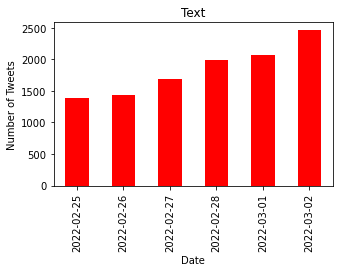

In [17]:
Altcoin_count.plot(kind='bar', color='red', figsize=(5,3))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [18]:
Bitcoin_count

Date
2022-02-25    32156
2022-02-26    25672
2022-02-27    25956
2022-02-28    39970
2022-03-01    39191
2022-03-02    32532
Name: Text, dtype: int64

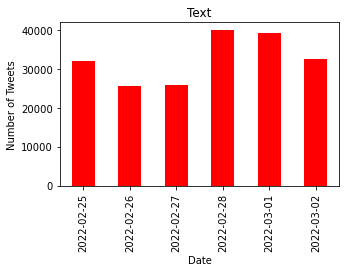

In [19]:
Bitcoin_count.plot(kind='bar', color='red', figsize=(5,3))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [20]:
Cryptocurrency_count

Date
2022-02-25    12649
2022-02-26    10661
2022-02-27    11049
2022-02-28    12796
2022-03-01    13690
2022-03-02    12349
Name: Text, dtype: int64

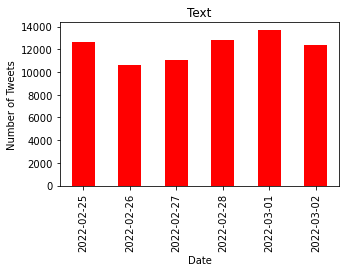

In [21]:
Cryptocurrency_count.plot(kind='bar', color='red', figsize=(5,3))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [22]:
Coindesk_count

Date
2022-02-25    22
2022-02-26    17
2022-02-27    18
2022-02-28    15
2022-03-01    15
2022-03-02    17
Name: Text, dtype: int64

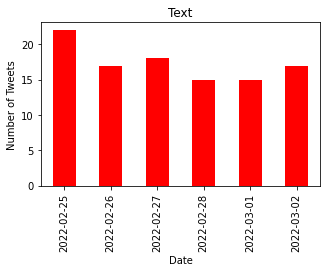

In [23]:
Coindesk_count.plot(kind='bar', color='red', figsize=(5,3))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [24]:
Gold_count

Date
2022-02-25    3249
2022-02-26    1439
2022-02-27    1612
2022-02-28    3195
2022-03-01    3377
2022-03-02    3263
Name: Text, dtype: int64

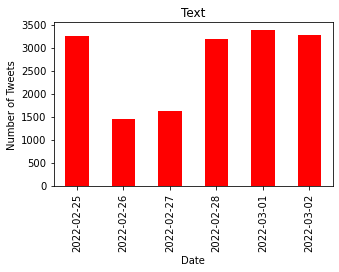

In [25]:
Gold_count.plot(kind='bar', color='red', figsize=(5,3))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [26]:
APPL_count

Date
2022-02-25    3
2022-02-26    1
2022-02-27    2
2022-02-28    3
2022-03-01    1
2022-03-02    8
Name: Text, dtype: int64

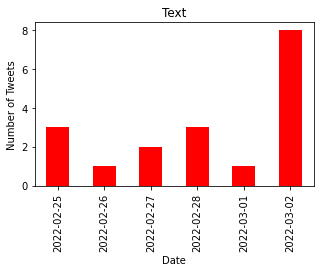

In [27]:
APPL_count.plot(kind='bar', color='red', figsize=(5,3))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [28]:
GOOG_count

Date
2022-02-25    6
2022-02-26    6
2022-02-27    8
2022-02-28    8
2022-03-01    6
2022-03-02    9
Name: Text, dtype: int64

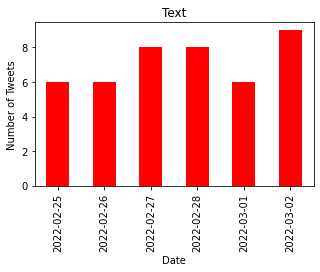

In [29]:
GOOG_count.plot(kind='bar', color='red', figsize=(5,3))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [30]:
YHOO_count

Date
2022-02-28    1
Name: Text, dtype: int64

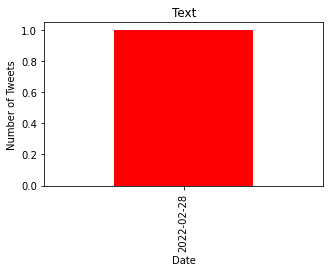

In [31]:
YHOO_count.plot(kind='bar', color='red', figsize=(5,3))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

#### Drawn a combined plot for comparison of tweets for different hashtags.

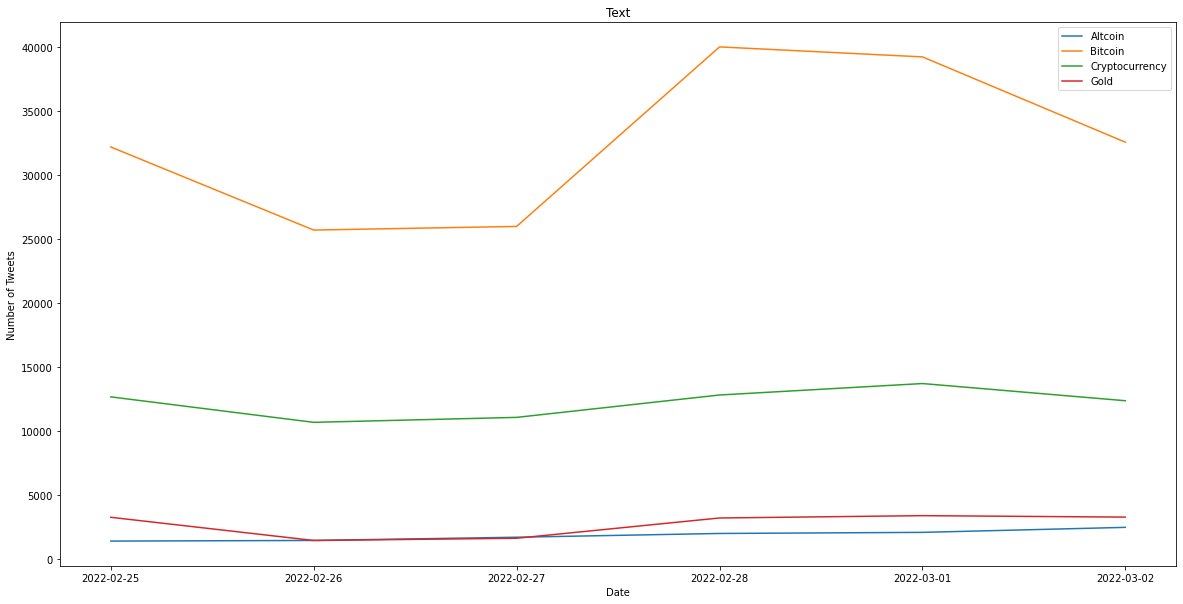

In [32]:
comb = pd.concat([Altcoin_count.rename("Altcoin"),
                  Bitcoin_count.rename("Bitcoin"), 
                  Cryptocurrency_count.rename("Cryptocurrency"), 
                  Gold_count.rename("Gold")], axis=1)

comb.plot(figsize=(20, 10))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

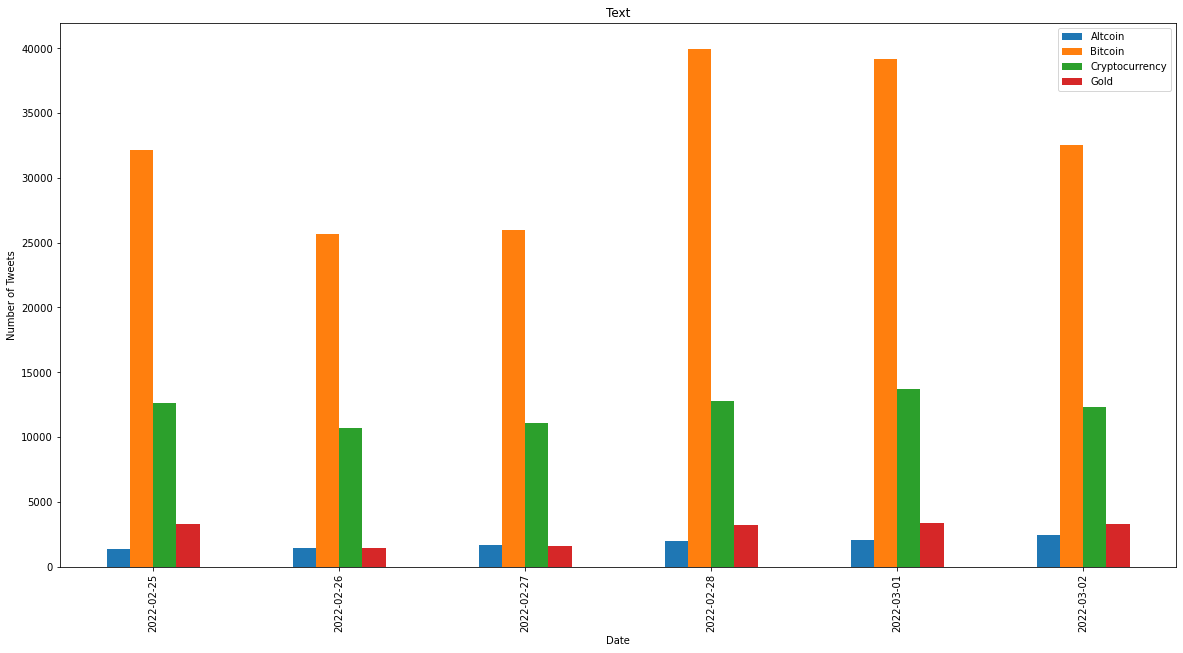

In [33]:
comb.plot(kind="bar",figsize=(20, 10))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

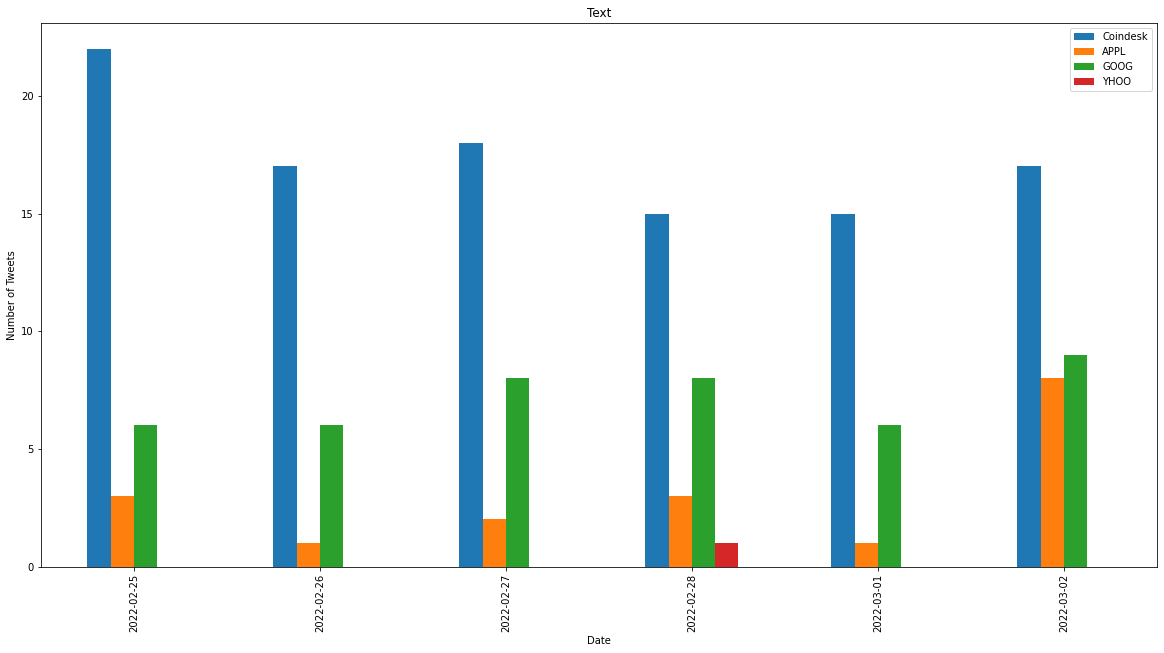

In [34]:
comb1 = pd.concat([Coindesk_count.rename("Coindesk"), 
                   APPL_count.rename("APPL"), 
                   GOOG_count.rename("GOOG"), 
                   YHOO_count.rename("YHOO")], axis=1)

comb1.plot(kind="bar",figsize=(20, 10))
plt.title('Text')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

# 4.0 Clustering of Tweets

In [35]:
review_list = []
for i in [Altcoin['clean_Altcoin'], Bitcoin['clean_Bitcoin'], Coindesk['clean_Coindesk'], Cryptocurrency['clean_Cryptocurrency'], gold['clean_Gold'], APPL['clean_APPL'], GOOG['clean_GOOG'], YHOO['clean_YHOO']]:
    for j in i:
        review_list.append(j)
review_list

['parma stilton mri altcoin',
 'moon akita maka altcoin via',
 'appreci check new video look next x altcoin crypto',
 'aav fear greed index current mild price usd market cap h trade volum altcoin fgi live analysi top cryptocurr',
 'parma stilton mri altcoin',
 'wave fear greed index current strong price usd market cap h trade volum altcoin fgi live analysi top cryptocurr',
 'dot see sustain chatter chan last day via',
 'harmoni fear greed index current mild one price usd market cap h trade volum altcoin fgi live analysi top cryptocurr',
 'uzun bir flood oldu bitcoin ndan beklentimi orta vaded detayl anlatmak istedim zira beklentim altcoin lerid negatif pozitif etkiliyor b lgede na l pozisyon almam z gerekti ini mutlaka renmeliyiz hayal satilir ger ekler ya anir',
 'moon akita maka altcoin via',
 'ukrain accept dogecoin donat defens russia doge meme altcoin token crypto',
 'bring end bitcoin genesi stage altcoin via',
 'parma stilton mri altcoin',
 'parma stilton mri altcoin',
 'parma s

In [36]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(review_list)
column_names = vectorizer.get_feature_names()
df1 = pd.DataFrame(X.toarray(), columns = column_names)

cos_sim = cosine_similarity(df1)
    
pca = PCA(n_components=no_of_PCA_comp)
cos_sim_pca = pca.fit_transform(cos_sim)
cos_sim_pca

kmeans = KMeans(n_clusters=8)
kmeans.fit(cos_sim_pca)

plt.scatter(cos_sim_pca[:, 0], cos_sim_pca[:, 1], c=kmeans.labels_, cmap='rainbow', s=300)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='black')
for i in range(cos_sim_pca.shape[0]):
    x=cos_sim_pca[i, 0]
    y=cos_sim_pca[i, 1]

plt.show()

MemoryError: Unable to allocate 269. GiB for an array with shape (296017, 122015) and data type float64

#### Not sufficient memory to run KMeans on the whole text of all the tweets fetched using all the hashtags. 

In [37]:
def cluster_plot(review_list, no_of_PCA_comp = 3, no_of_clusters = 3):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(review_list)
    column_names = vectorizer.get_feature_names()
    df1 = pd.DataFrame(X.toarray(), columns = column_names)

    cos_sim = cosine_similarity(df1)
    
    pca = PCA(n_components=no_of_PCA_comp)
    cos_sim_pca = pca.fit_transform(cos_sim)
    cos_sim_pca
    
    kmeans = KMeans(n_clusters=no_of_clusters)
    kmeans.fit(cos_sim_pca)

    plt.scatter(cos_sim_pca[:, 0], cos_sim_pca[:, 1], c=kmeans.labels_, cmap='rainbow', s=300)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='black')
    for i in range(cos_sim_pca.shape[0]):
        x=cos_sim_pca[i, 0]
        y=cos_sim_pca[i, 1]

    plt.show()

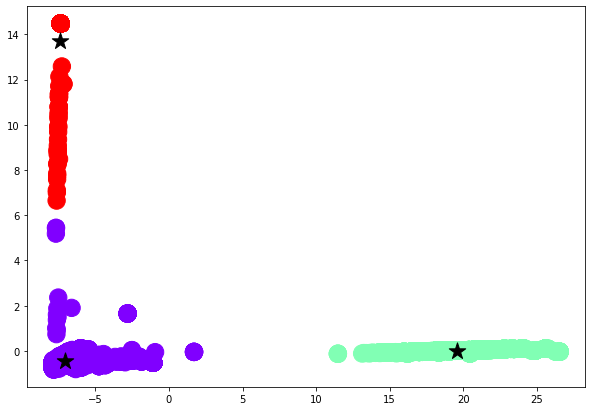

In [38]:
Altcoin_list = [i for i in Altcoin['clean_Altcoin']]
cluster_plot(Altcoin_list)

In [39]:
cluster_plot([i for i in Bitcoin['clean_Bitcoin']], 5, 5)

MemoryError: Unable to allocate 146. GiB for an array with shape (195477, 100039) and data type float64

#### Not sufficient memory to run the TfIdf Vectorizer on the Bitcoin and Cryptocurrency due to their huge sizes.

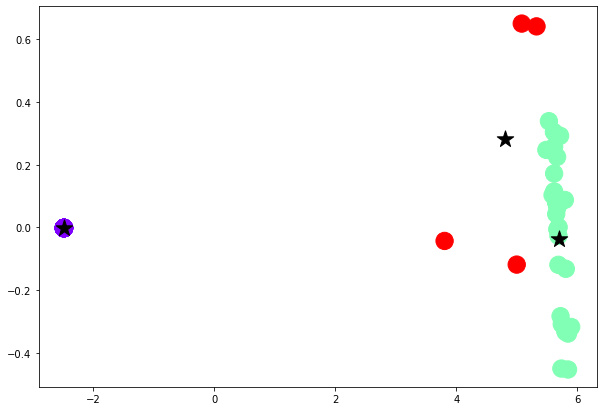

In [41]:
cluster_plot([i for i in Coindesk['clean_Coindesk']])

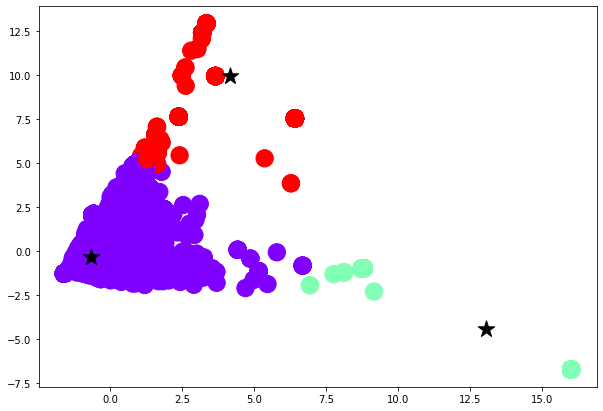

In [42]:
cluster_plot([i for i in gold['clean_Gold']])

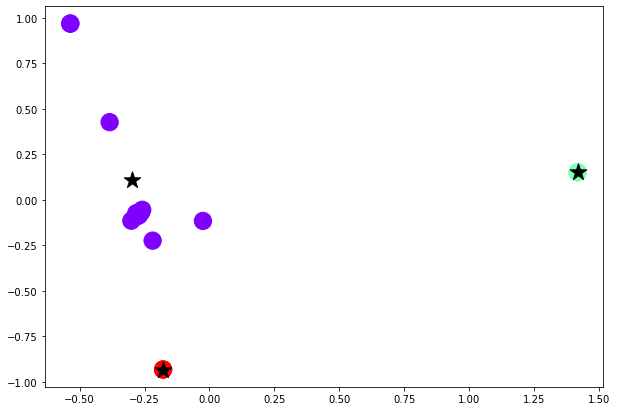

In [43]:
cluster_plot([i for i in APPL['clean_APPL']])

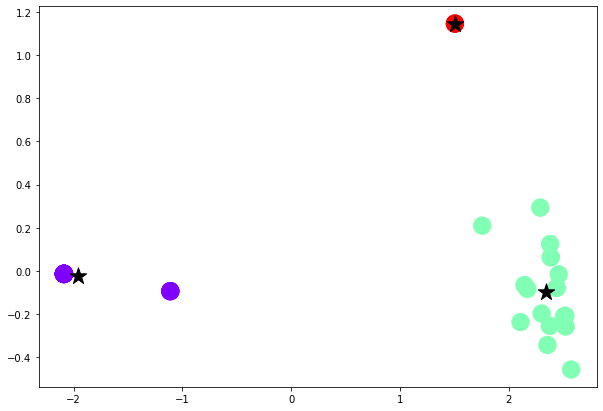

In [44]:
GOOG_list = [i for i in GOOG['clean_GOOG']]
cluster_plot(GOOG_list, 4)

# 5.0 Results

Apart from Bitcoin and Cryptocurrency, we got results for Kmeans clustering. Each keywords happened to be grouped into 3 separate and well segregated clusters.